Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

<ipython-input-47-3b7bc49b4dc4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Gender'], palette='pastel')


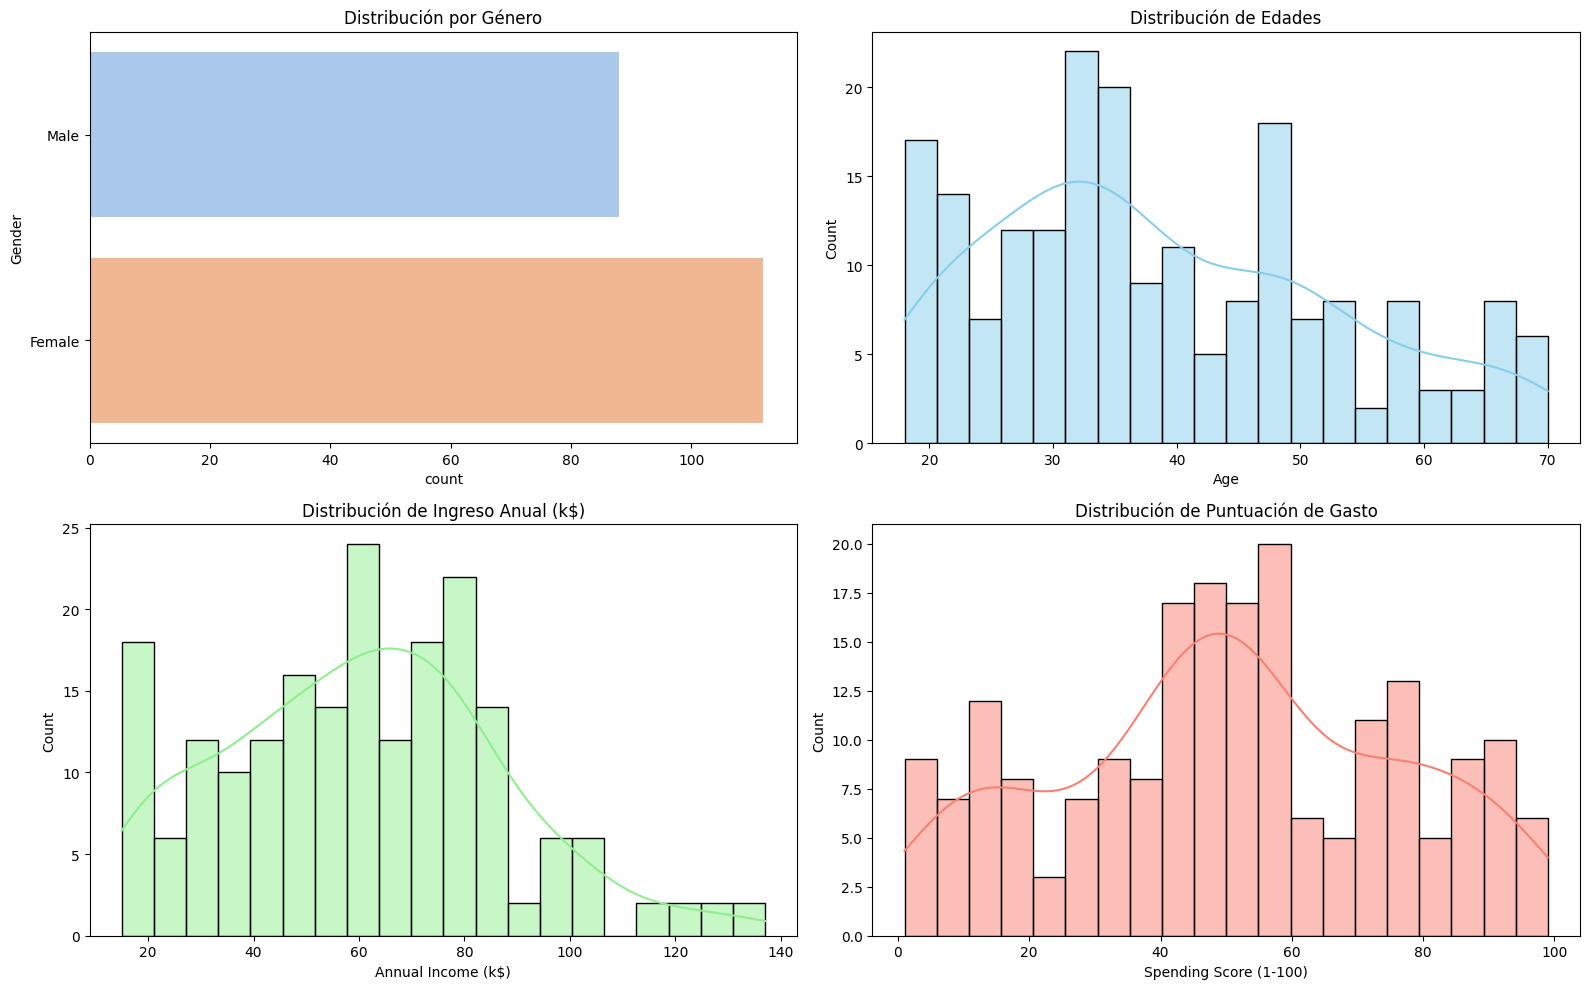

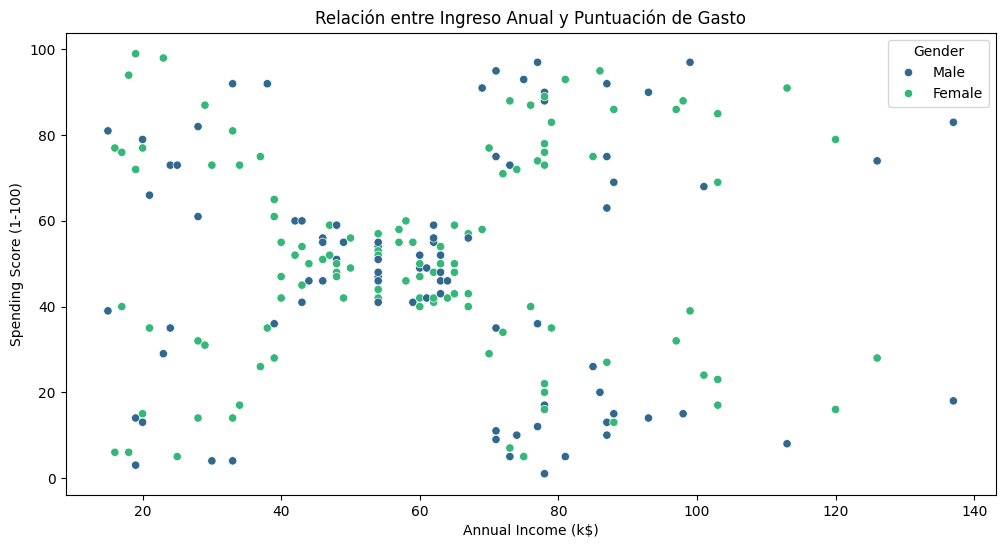

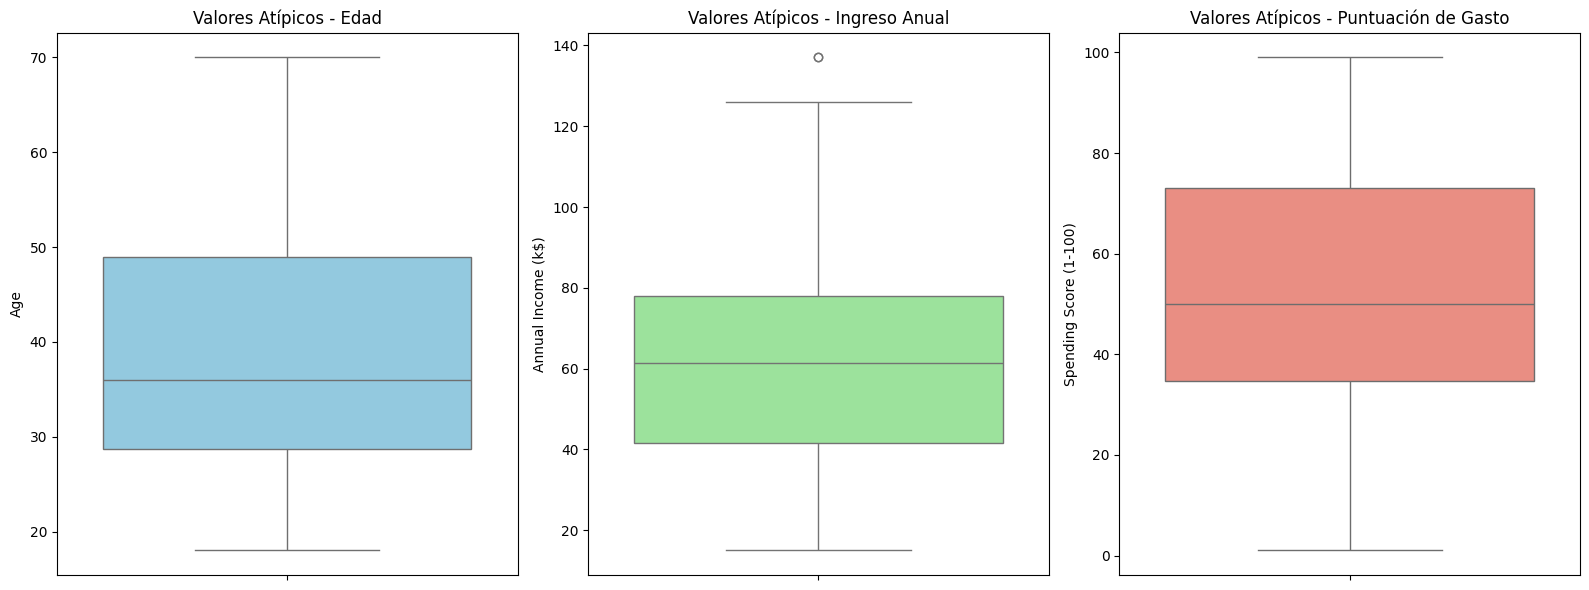

Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Primeras filas después de codificar 'Gender':
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40

Datos escalados (primeras filas):
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662

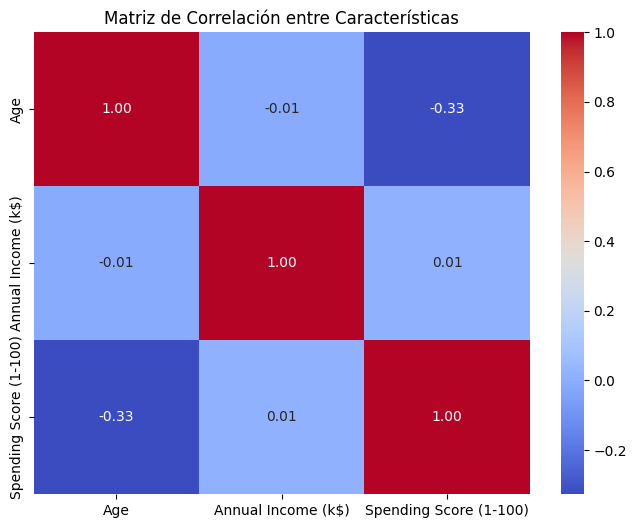

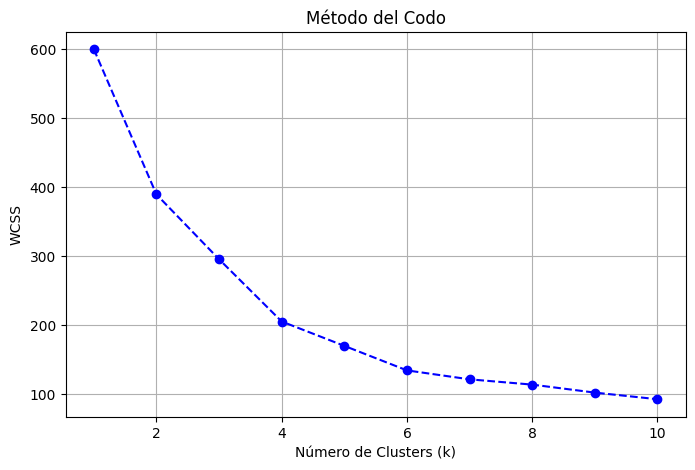


Centroides del modelo K-means:
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]

Asignación de clusters (primeras filas):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  

Coeficiente de Silhouette para k=5: 0.41
Coeficiente de Silhouette: 0.41
Índice de Calinski-Harabasz: 123.42


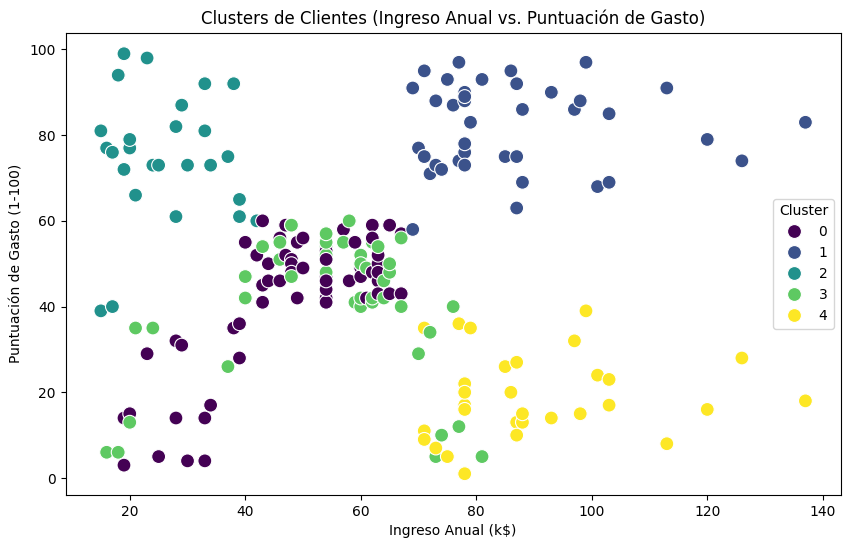

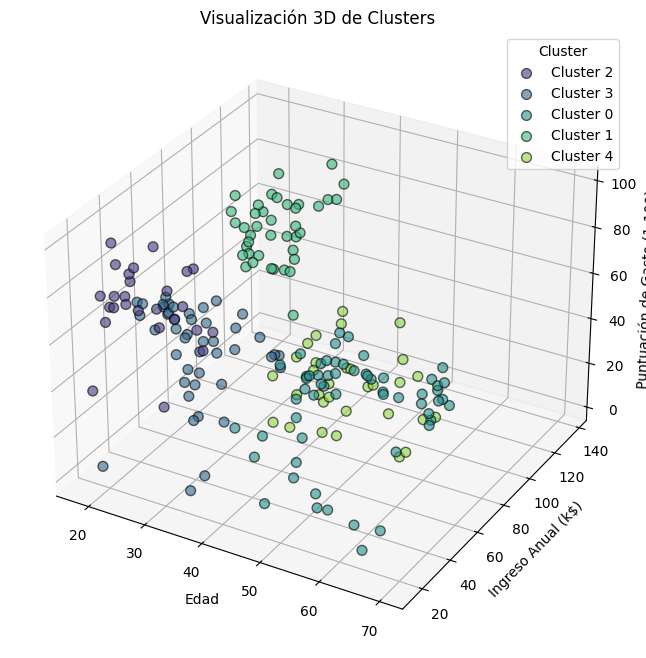

Resumen promedio de características por cluster:
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         68.775862  0.568966  55.275862           47.620690   
1        161.025000  0.550000  32.875000           86.100000   
2         23.461538  0.576923  25.769231           26.115385   
3         86.377778  0.600000  26.733333           54.311111   
4        166.870968  0.483871  44.387097           89.774194   

         Spending Score (1-100)  
Cluster                          
0                     41.706897  
1                     81.525000  
2                     74.846154  
3                     40.911111  
4                     18.483871  

Interpretación del Coeficiente de Silhouette y Calinski-Harabasz:
Coeficiente de Silhouette (k=5): 0.41
Índice de Calinski-Harabasz: 123.42

Conclusiones:

1. Cluster 0: [Productos accesibles y promociones frecuentes. Estos clientes podrían responder bien a progr

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Paso 1:

# Cargar el dataset desde la carpeta de archivos:
df = pd.read_csv('Mall_Customers.csv')

# 1.1 Resumen general del dataset:
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# 1.2 Distribuciones de las variables:
plt.figure(figsize=(16, 10))

# Distribución por género:
plt.subplot(2, 2, 1)
sns.countplot(df['Gender'], palette='pastel')
plt.title('Distribución por Género')

# Distribución de edades.
plt.subplot(2, 2, 2)
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribución de Edades')

# Distribución del ingreso anual:
plt.subplot(2, 2, 3)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='lightgreen')
plt.title('Distribución de Ingreso Anual (k$)')

# Distribución de la puntuación de gasto:
plt.subplot(2, 2, 4)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='salmon')
plt.title('Distribución de Puntuación de Gasto')

plt.tight_layout()
plt.show()

# 1.3 Relación entre variables:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='viridis')
plt.title('Relación entre Ingreso Anual y Puntuación de Gasto')
plt.show()

# 1.4 Identificación de valores atípicos:
plt.figure(figsize=(16, 6))

# Boxplot para la edad:
plt.subplot(1, 3, 1)
sns.boxplot(df['Age'], color='skyblue')
plt.title('Valores Atípicos - Edad')

# Boxplot para el ingreso anual:
plt.subplot(1, 3, 2)
sns.boxplot(df['Annual Income (k$)'], color='lightgreen')
plt.title('Valores Atípicos - Ingreso Anual')

# Boxplot para la puntuación de gasto:
plt.subplot(1, 3, 3)
sns.boxplot(df['Spending Score (1-100)'], color='salmon')
plt.title('Valores Atípicos - Puntuación de Gasto')

plt.tight_layout()
plt.show()



# Paso 2: Preprocesamiento de los datos:

# Verificar valores faltantes:
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Codificar la columna 'Gender':
# Convertimos la variable categórica 'Gender' a una numérica (Male = 0, Female = 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

print("\nPrimeras filas después de codificar 'Gender':")
print(df.head())

# Escalado de características numéricas:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas relevantes para el modelo:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Escalar las características:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Convertir el resultado escalado en un DataFrame para mayor claridad:
df_scaled = pd.DataFrame(df_scaled, columns=features)

print("\nDatos escalados (primeras filas):")
print(df_scaled.head())



# Paso 3: Selección de características:

# Para este caso, se utilizan todas las características escaladas:
# 'Age', 'Annual Income (k$)', y 'Spending Score (1-100)'
# Ya están escaladas en el DataFrame 'df_scaled'.

# Resumen de las características seleccionadas:
print("Características seleccionadas para clustering:")
print(df_scaled.columns.tolist())

# Verificar correlación entre características para evaluar redundancia:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Características")
plt.show()

# Decisión: Si las correlaciones son bajas, se mantienen las características.
# En este caso, se procede con las 3 seleccionadas.



# Paso 4: Entrenamiento del modelo K-means.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Método del Codo para determinar el número óptimo de clusters:
wcss = []
k_values = range(1, 11)
# Within-cluster sum of squares (WCSS)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Visualización del Método del Codo:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Seleccionar el número óptimo de clusters (ejemplo, k=5 basado en la gráfica del codo)
optimal_k = 5

# Entrenar el modelo K-means con el número óptimo de clusters:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Añadir las etiquetas de los clusters al dataset original:
df['Cluster'] = cluster_labels

print("\nCentroides del modelo K-means:")
print(kmeans.cluster_centers_)

print("\nAsignación de clusters (primeras filas):")
print(df.head())

# Evaluación del modelo con Silhouette Score:
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f"\nCoeficiente de Silhouette para k={optimal_k}: {silhouette_avg:.2f}")



# Paso 5: Evaluación del modelo:

from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluar el modelo K-means con el número óptimo de clusters:
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(df_scaled, cluster_labels)

print(f"Coeficiente de Silhouette: {silhouette_avg:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.2f}")



# Paso 6:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gráfico de dispersión 2D: Ingreso Anual vs. Puntuación de Gasto.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('Clusters de Clientes (Ingreso Anual vs. Puntuación de Gasto)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

# Visualización 3D: Edad, Ingreso Anual y Puntuación de Gasto.
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignación de colores por cluster:
colors = sns.color_palette("viridis", len(df['Cluster'].unique()))

# Creación del gráfico 3D:
for cluster, color in zip(df['Cluster'].unique(), colors):
    subset = df[df['Cluster'] == cluster]
    ax.scatter(subset['Age'], subset['Annual Income (k$)'], subset['Spending Score (1-100)'],
               s=50, c=[color], label=f'Cluster {cluster}', edgecolor='k', alpha=0.6)

# Etiquetas y título:
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso Anual (k$)')
ax.set_zlabel('Puntuación de Gasto (1-100)')
plt.title('Visualización 3D de Clusters')
plt.legend(title='Cluster')
plt.show()



# Análisis de cada cluster para características principales:
cluster_summary = df.groupby('Cluster').mean()
print("Resumen promedio de características por cluster:")
print(cluster_summary)

# Insights adicionales:
print("\nInterpretación del Coeficiente de Silhouette y Calinski-Harabasz:")
print(f"Coeficiente de Silhouette (k={optimal_k}): {silhouette_avg:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.2f}")

print("\nConclusiones:")
print("""
1. Cluster 0: [Productos accesibles y promociones frecuentes. Estos clientes podrían responder bien a programas de fidelización o descuentos regulares.]
2. Cluster 1: [Campañas de prueba de producto o descuentos de primera compra para incentivar la fidelización. El objetivo es aumentar su participación en el gasto.]
3. Cluster 2: [Promocionar productos de calidad con características de durabilidad o exclusividad. Podrían responder bien a ediciones limitadas o productos de calidad premium.]
4. Cluster 3: [Estos clientes son ideales para productos de lujo. Invertir en campañas de alta gama, experiencia de cliente superior y beneficios exclusivos.]
5. Cluster 4: [Ofrecer servicios de personalización y exclusividad. Su gasto puede ser incentivado si se sienten valorados y únicos.]
""")




